In [170]:
import os
import nltk
import matplotlib.pyplot as plt
import numpy as np
import math

# Source of Data
This dataset is derived from project Gutenberg's version. It is the data directory of this folder.  

In [171]:
list_of_files = os.listdir('./data/')
Papers = {
    'Jay': [2,3,4,5],
    'Hamilton and Madison':[18,19,20],
    'Madison':[10,14,37,38,39,40,41,42,43,44,45,46,47,48],
    'Hamilton':[1,6,7,8,9,11,12,13,15,16,17,21,22,23,24,25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 59, 60, 61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85],
    'Test Case': [64],
    'Disputed':[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63]
}

In [128]:
print(Papers['Disputed'])

[['dispt', 'fed', '63.txt'], ['dispt', 'fed', '49.txt'], ['dispt', 'fed', '58.txt'], ['dispt', 'fed', '54.txt'], ['dispt', 'fed', '55.txt'], ['dispt', 'fed', '50.txt'], ['dispt', 'fed', '51.txt'], ['dispt', 'fed', '56.txt'], ['dispt', 'fed', '62.txt'], ['dispt', 'fed', '57.txt'], ['dispt', 'fed', '52.txt'], ['dispt', 'fed', '53.txt']]


In [172]:
def read_papers(filename):
    Authors = ['HAMILTON','JAY','MADISON, with HAMILTON','MADISON']
    with open('./data/federalist_'+str(filename)+'.txt','r') as f:
        text = f.readlines()
        formatted_text = []
        for line in text:
            if all(author not in line for author in Authors):
                if line.strip('\n').strip() != '': 
                    # print('hey')
                    formatted_text.append(line.strip('\n').strip())
        entire_text = '\n'. join(formatted_text)
        tokens = nltk.word_tokenize(entire_text)
        tokens = list(filter(lambda x: x.isalpha(),tokens))
        tokens = list(map(lambda x: x.lower(),tokens))
    return tokens

# Mendenhalls Characteristic Curves

In [173]:
def Mendenhalls_characteristic_curves(Author): 
    count = {}
    if Papers.get(Author) == None:
        print('wrong author')
        return 
    for paper in Papers[Author]:
        tokens = read_papers(paper)
        token_lengths = list(map(lambda x: len(x),tokens))
        freq = list(nltk.FreqDist(token_lengths).items())
        for val in freq: 
            if count.get(str(val[0])) == None:
                count[str(val[0])] = val[1]
            else :
                count[str(val[0])] += val[1]
    max_label = len(list(count.keys()))
    count = sorted(list(count.items()),reverse=True,key=lambda x: x[1])
    count_values = list(map(lambda x: x[1],count))
    count_keys = list(map(lambda x:x[0],count))
    print(count)
    plt.plot(count_values)
    plt.xticks(ticks=list(range(max_label)),labels=count_keys)
    plt.xlabel('length of words')
    plt.ylabel('number of words')
    plt.title('Mendenhall\'s Characteristic Curves for ' + Author)
    return count

[('2', 1188), ('3', 1182), ('4', 969), ('5', 630), ('7', 516), ('6', 490), ('8', 367), ('9', 284), ('10', 230), ('11', 127), ('1', 76), ('13', 53), ('12', 43), ('14', 13), ('15', 5)]


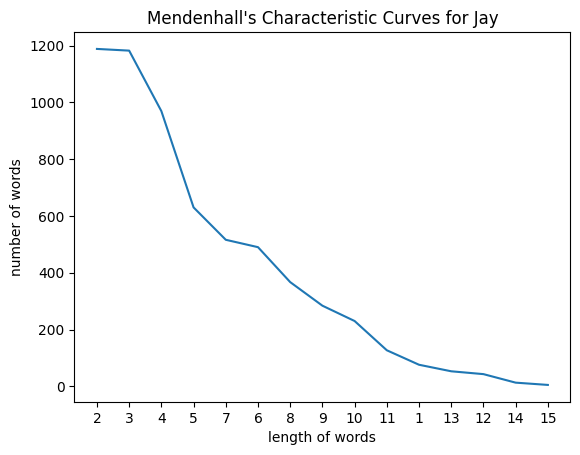

In [174]:
count = Mendenhalls_characteristic_curves('Jay')

[('2', 25665), ('3', 21852), ('4', 14872), ('5', 11496), ('6', 8458), ('7', 7574), ('8', 6111), ('9', 5476), ('10', 4205), ('1', 2773), ('11', 2633), ('12', 1514), ('13', 746), ('14', 404), ('15', 110), ('16', 26), ('17', 6), ('19', 1), ('18', 1)]


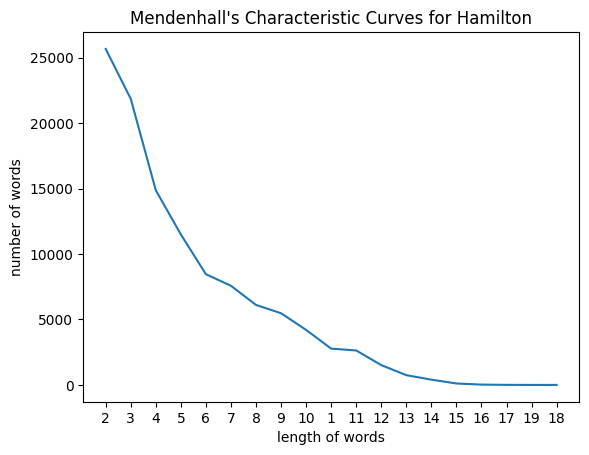

In [175]:
count = Mendenhalls_characteristic_curves('Hamilton')

[('2', 8226), ('3', 7931), ('4', 4947), ('5', 3747), ('6', 2980), ('7', 2733), ('8', 2165), ('9', 1926), ('10', 1599), ('11', 997), ('1', 818), ('12', 555), ('13', 263), ('14', 149), ('15', 48), ('16', 8)]


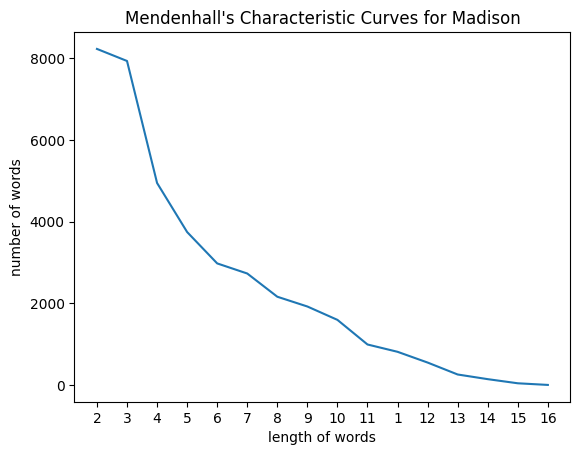

In [176]:
count = Mendenhalls_characteristic_curves('Madison')

[('3', 1267), ('2', 1014), ('4', 681), ('7', 507), ('5', 502), ('6', 465), ('8', 373), ('9', 304), ('10', 204), ('11', 166), ('1', 94), ('12', 83), ('13', 47), ('14', 14), ('15', 4), ('16', 1), ('19', 1)]


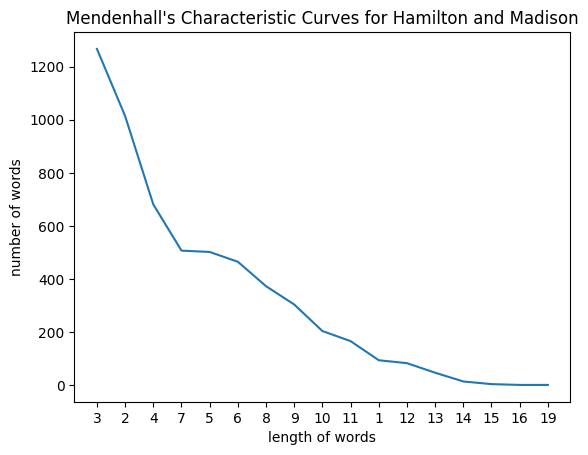

In [177]:
count = Mendenhalls_characteristic_curves('Hamilton and Madison')

[('2', 492), ('3', 482), ('4', 387), ('5', 194), ('6', 166), ('7', 153), ('8', 143), ('9', 113), ('10', 72), ('11', 46), ('1', 32), ('12', 27), ('13', 10), ('14', 5), ('15', 2), ('16', 1)]


[('2', 492),
 ('3', 482),
 ('4', 387),
 ('5', 194),
 ('6', 166),
 ('7', 153),
 ('8', 143),
 ('9', 113),
 ('10', 72),
 ('11', 46),
 ('1', 32),
 ('12', 27),
 ('13', 10),
 ('14', 5),
 ('15', 2),
 ('16', 1)]

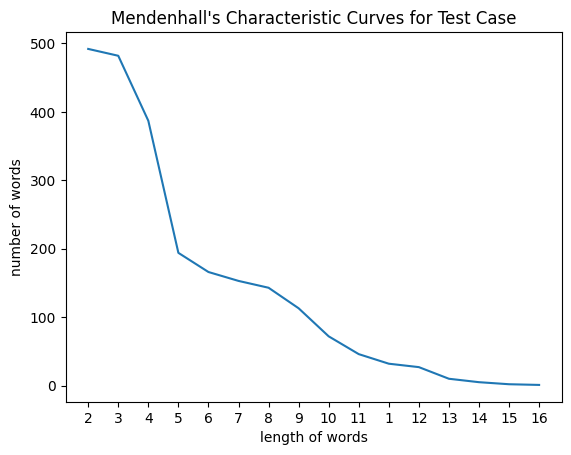

In [178]:
Mendenhalls_characteristic_curves('Test Case')

# Kilgariff's Chi Squared Distance

In [179]:
def Kilgariff_Chi_Squared_Distance(Authors):
    if len(Authors) != 2:
        print('Give a pair of Authors or 2 collections to consider')
        return  
    author_contribution = []
    token_collections = []
    for Author in Authors:
        tokens_individual = []
        for papers in Papers[Author]:
            tokens = read_papers(papers)
            if tokens_individual == []: 
                tokens_individual = tokens
            else :
                tokens_individual += tokens
        token_collections += tokens_individual  
        author_contribution.append(tokens_individual)
    author_0_contri = len(author_contribution[0])/len(token_collections)
    author_1_contri = 1 - author_0_contri
    totalFreqDist = nltk.FreqDist(token_collections)
    most_common = totalFreqDist.most_common(500)
    value = 0
    for word,count in most_common:
        expected_0 = count * author_0_contri
        original_0 = author_contribution[0].count(word)
        expected_1 = count * author_1_contri
        original_1 = author_contribution[1].count(word)
        value += ( (original_0 - expected_0)**2 ) / expected_0
        value += ( (original_1 - expected_1)**2 ) / expected_1
    return value   
    

In [180]:
print( 'The value of Chi-squared statistic between Hamilton and Disputed works is ',Kilgariff_Chi_Squared_Distance(['Hamilton','Disputed']) )
print( 'The value of Chi-squared statistic between Madison and Disputed works is ',Kilgariff_Chi_Squared_Distance(['Madison','Disputed']) )


The value of Chi-squared statistic between Hamilton and Disputed works is  3428.2680339825624
The value of Chi-squared statistic between Madison and Disputed works is  1917.3408961655448


# John Burrows Delta

In [181]:
def John_Burrows_Delta(list_of_authors,testcase):
    if len(list_of_authors) == 1:
        print('give a list of authors')
        return
    # finding the feature
    authorText = {}
    totalCorpus = []
    for author in list_of_authors:
        totalTokens = []
        for paper in Papers[author]:
            totalTokens+= read_papers(paper)
        totalCorpus += totalTokens
        authorText[author] = totalTokens
    totalFreqDist = nltk.FreqDist(totalCorpus)
    features = totalFreqDist.most_common(30)
    # calculate percentages 
    percentages = {}
    percents = {}
    for author in list_of_authors:
        percents[author] = {}
        for word,word_count in features:
            percent = ( authorText[author].count(word) / len(authorText[author]) )
            percents[author][word] = percent
            if percentages.get(word) == None:
                percentages[word] = [percent]
            else:
                percentages[word].append(percent)
    # calculates means
    means  = {}
    stds = {}
    for word,word_count in features:
        arr = np.array(percentages[word])
        means[word] = np.average(arr)
        stds[word] = np.sqrt(np.mean((arr - np.mean(arr)) ** 2))
    # calculate the z scores
    Zscore = {}
    for index,author in enumerate(list_of_authors):
        Zscore[author] = {}
        for word,word_count in features:
            Zscore[author][word] = (percentages[word][index] - means[word])/stds[word]
    # for the testcase
    testcase_tokens = []
    for paper in Papers[testcase]:
        testcase_tokens += read_papers(paper)
    testcase_zscores = {}
    for word,word_count in features:
        counts = testcase_tokens.count(word)
        percents= counts/len(testcase_tokens)
        testcase_zscores[word] = (percents-means[word])/stds[word]
        print('Testcase Z-Scores for the feature:',word,'is',testcase_zscores[word])
    # deltas
    for author in list_of_authors:
        delta = 0
        for word,word_count in features:
            delta += math.fabs(testcase_zscores[word]-Zscore[author][word])
        delta /= len(features)
        print('Delta value for the author:' + author + ' is ', delta)       
    

In [182]:
John_Burrows_Delta(['Hamilton','Madison','Hamilton and Madison','Jay','Disputed'],'Test Case')

Testcase Z-Scores for the feature: the is -0.867195504115425
Testcase Z-Scores for the feature: of is -2.039481350669909
Testcase Z-Scores for the feature: to is 1.1426410724509355
Testcase Z-Scores for the feature: and is 1.1397660590354115
Testcase Z-Scores for the feature: in is 0.6607658939790656
Testcase Z-Scores for the feature: a is -1.0512621654518186
Testcase Z-Scores for the feature: be is 1.144151635014207
Testcase Z-Scores for the feature: that is 1.999875332410125
Testcase Z-Scores for the feature: it is -0.16008957214270533
Testcase Z-Scores for the feature: is is -1.0198293532409684
Testcase Z-Scores for the feature: which is -2.3090917123384918
Testcase Z-Scores for the feature: by is 1.2165249891316747
Testcase Z-Scores for the feature: as is 5.502911714196284
Testcase Z-Scores for the feature: this is -1.4077893240198835
Testcase Z-Scores for the feature: not is 0.8848562325785044
Testcase Z-Scores for the feature: would is -0.9323110764392669
Testcase Z-Scores for th